# Week 3 - Logistic Regression & Regularization

This week we're covering logistic regression and regularization. Logistic regression is a method for classifying data into discrete outcomes, such as classifying an email as spam or not spam. Regularization helps models prevent overfitting the training data.

The topics we'll be covering this week are:
* Logistic Regression
  * Classification and Representation
    * Classification
    * Hypothesis Representation
    * Decision Boundary
  * Logistic Regression Model
    * Cost Function
    * Simplified Cost Function and Gradient Descent
    * Advanced Optimization
  * Multiclass Classification
    * One-vs-All
* Regularization
  * Solving the Problem of Overfitting
    * The Problem of Overfitting
    * Cost Function
    * Regularized Linear Regression
    * Regularized Logistic Regression
    
## Logistic Regression

Logistic regression is a method for classifying data into discrete outcomes, such as classifying an email as spam or not spam.

### Classification and Representation

#### Classification

Some examples where classification would be useful:
* Email: Spam/Not Spam?
* Online Transactions: Faudulent? (Yes/No)
* Tumor: Malignant/Benign?

In these examples, the output takes on either a positive or negative class:

$$
y \in {0,1}
$$

where
* 0: "Negative Class" (e.g., benign tumor)
* 1: "Positive Class" (e.g., malignant tumor)

We'll start with binary classification problems such as these. How do we develop these problems? Let's say we have a training dataset of tumor sizes (normalized on the mean tumor size) that looks like

Tumor Size | Malignant?
--- | ---
0.2 | 0
0.4 | 0
0.6 | 0
0.8 | 0
1.2 | 1
1.4 | 1
1.6 | 1
1.8 | 1

If we set a linear regression to this, that is

$$ h_\theta (x) = \theta^T x ,$$

then we might set a threshold classifier output at 0.5 such that
* if $h_\theta (x) \geq 0.5$, predict $y = 1$
* if $h_\theta (x) < 0.5$, predict $y = 0$

Let's code up what this might look like.

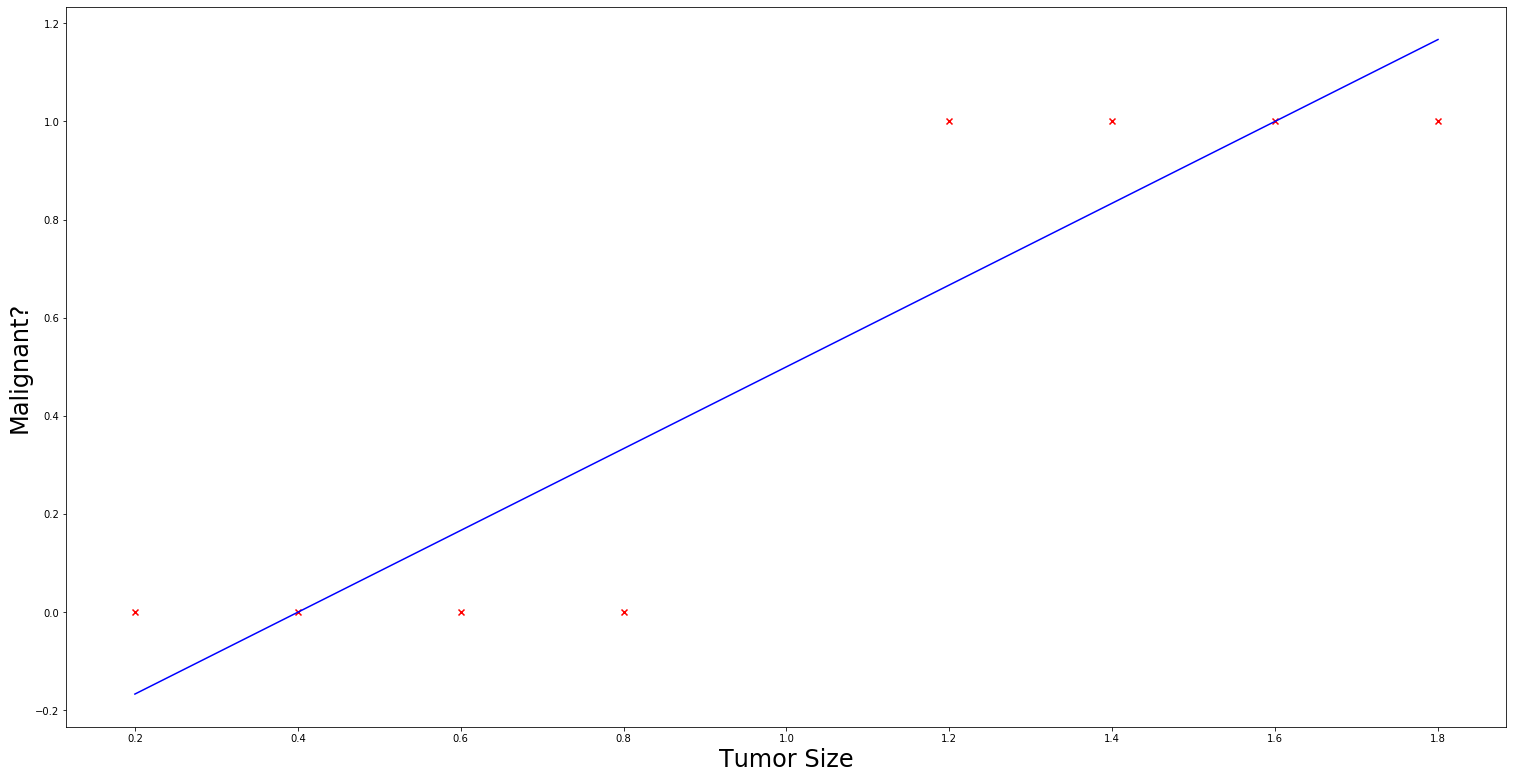

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

# Set up training sample
x = np.array([0.2,0.4,0.6,0.8,1.2,1.4,1.6,1.8])
y = np.array([0,0,0,0,1,1,1,1])

# Create a simple line of best fit
m,b = np.polyfit(x,y,1)
h = b+m*x

# Plot data
fig=plt.figure(figsize=(20,10));
ax=fig.add_axes([0,0,1,1]);
ax.plot(x,h,color='b');
ax.scatter(x,y,color='r',marker="x");
ax.set_xlabel('Tumor Size',fontsize=24);
ax.set_ylabel('Malignant?',fontsize=24);

So here we've broken the linear regression output into two separate classes that does a reasonable job. But now let's say we have some outlier addition to the data. Let's look at where that falls based on our old predictor linear regression.

Tumor Size | Malignant?
--- | ---
0.2 | 0
0.4 | 0
0.6 | 0
0.8 | 0
1.2 | 1
1.4 | 1
1.6 | 1
1.8 | 1
4.0 | 1

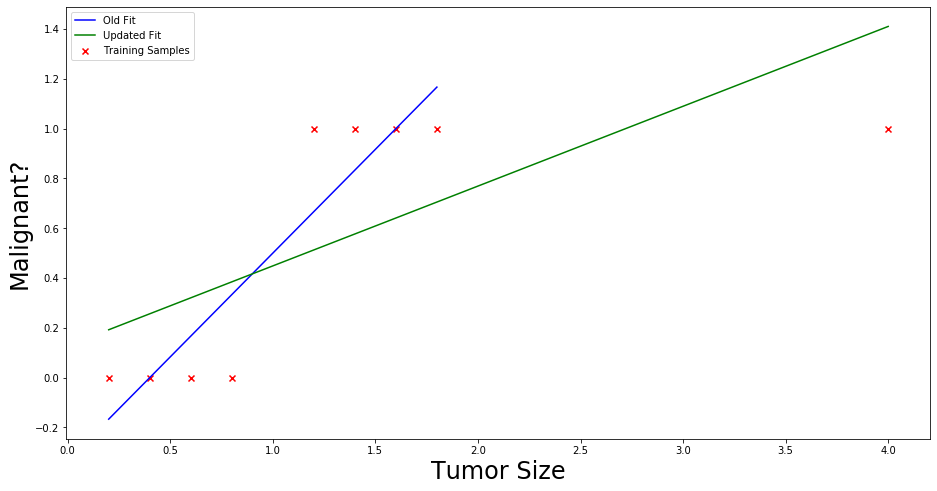

In [2]:
# Set up training sample
x = np.array([0.2,0.4,0.6,0.8,1.2,1.4,1.6,1.8,4.0])
y = np.array([0,0,0,0,1,1,1,1,1])

# Create a simple line of best fit
m,b = np.polyfit(x,y,1)
h2 = b+m*x

# Plot data
fig=plt.figure(figsize=(20,10));
ax=fig.add_axes([0,0,1,1]);
ax.plot(x[:-1],h,color='b');
ax.plot(x,h2,color='g');
ax.scatter(x,y,color='r',marker="x");
ax.set_xlabel('Tumor Size',fontsize=24);
ax.set_ylabel('Malignant?',fontsize=24);
ax.legend(("Old Fit","Updated Fit","Training Samples"),fontsize=24);

Our method of thresholding would now shift upwards, when it was clear before that our threshold should have been as it was in the previous training dataset. So applying linear regression to a classification is often a poor choice.

It's also strange that our linear regression method gives us results that are much smaller or larger than 0 or 1, when our training data is only 0 or 1.

So we turn now to logistic regression instread of linear regression. Our logistic regression will have the property

$$ 0 \leq h_\theta (x) \leq 1 $$

#### Hypothesis Representation

Our logistic regression hypothesis will now take on the following:

$$ h_\theta (x) = g (\theta^T x) = \frac{1}{1 + \exp(- \theta^T x)} $$

Here, the sigmoid, or logistic function is 

$$ g(z) = \frac{1}{1 + \exp(- z)} $$

Let's see what the function looks like.

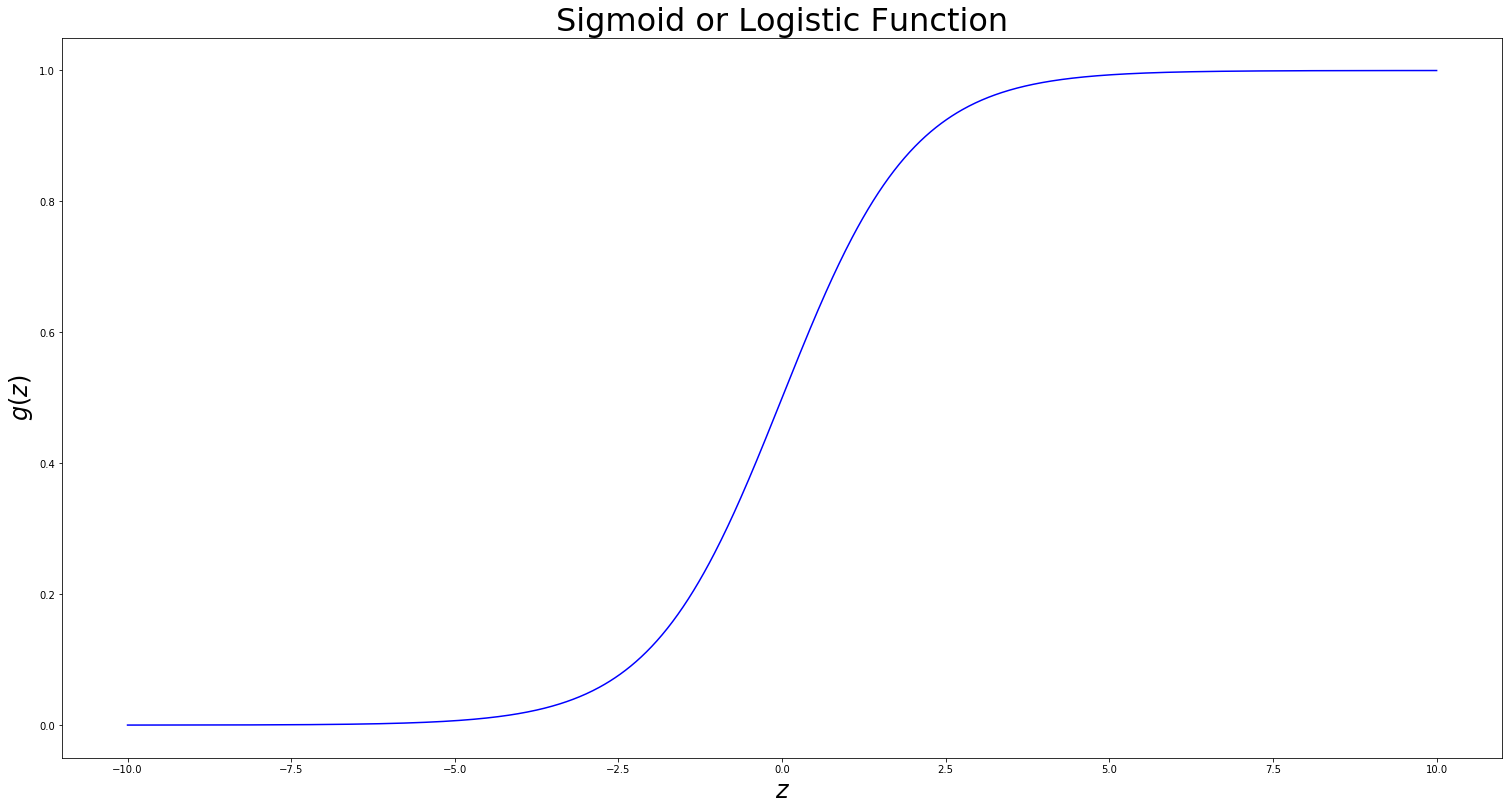

In [2]:
# Set up training sample
z = np.linspace(-10,10,1000)
g = 1./(1. + np.exp(-z))

# Plot data
fig=plt.figure(figsize=(20,10));
ax=fig.add_axes([0,0,1,1]);
ax.plot(z,g,color='b');
ax.set_xlabel('$z$',fontsize=24);
ax.set_ylabel('$g(z)$',fontsize=24);
ax.set_title('Sigmoid or Logistic Function',fontsize=32);

Here's how we interprest the output of our hypothesis: the output of the hypothesis is the *probability* that the output is in the positive class (=1). Mathematically,

$$ h_\theta (x) = P (y = 1 | x ; \theta)  = 1 - P (y = 0 | x ; \theta) $$

#### Decision Boundary

Suppose we predict
* $y = 1$ if $h_\theta (x) \geq 0.5$
* $y = 0$ if $h_\theta (x) < 0.5$

Looking at the plot of the sigmoid function, we notice

$$ g(z) \geq 0.5 \text{ when } z \geq 0 \\
g(z) < 0.5 \text{ when } z > 0 $$

Thus

$$ h_\theta (x) \geq 0.5 \text{ when } \theta^T x \geq 0 \\
h_\theta (x) < 0.5 \text{ when } \theta^T x < 0$$

The goal is to "draw" a proper boundary about this probability threshold to predict which class a point would lie. Let's look at an example in the following section of code. The hypothesis parameters here are

$$ 
\theta = 
\begin{bmatrix}
-3 \\ 1 \\ 1
\end{bmatrix}
$$

for 

$$
h_\theta(x) = g ( \theta_0 + \theta_1 x_1 + \theta_2 x_2 ) 
$$

This means that we predict 

$$ y=1 \text{ if } -3 + x_1 + x_2 \geq 0 $$

or 

$$ y=1 \text{ if } x_1 + x_2 \geq 3 $$



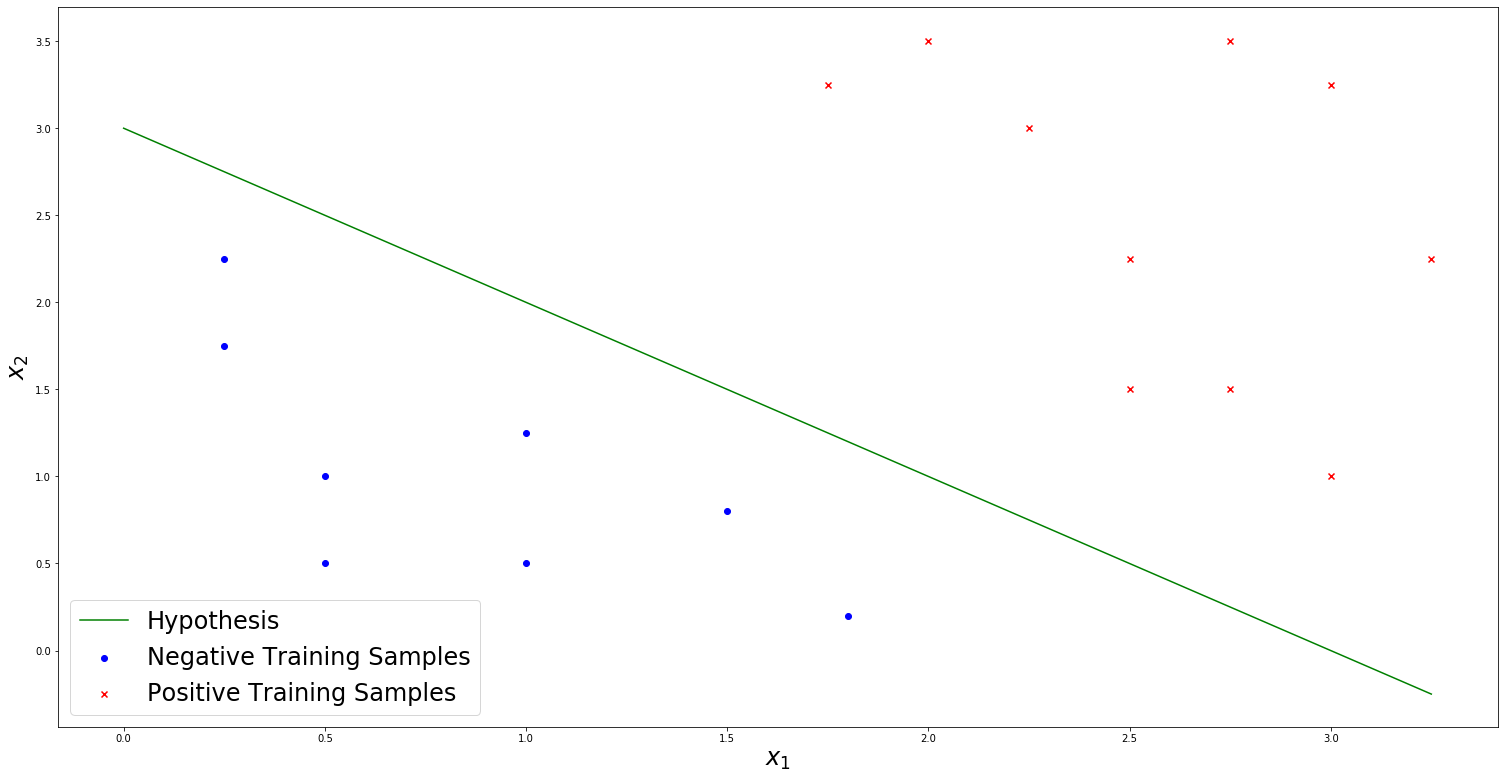

In [3]:
# Set up training sample
Xneg = [[0.5,0.5],[1.0,0.5],[1.8,0.2],[1.5,0.8],[0.5,1.0],[1.0,1.25],[0.25,1.75],[0.25,2.25]]
Xpos = [[3.0,1.0],[2.75,1.5],[2.5,1.5],[2.5,2.25],[3.25,2.25],[2.25,3.0],[3.0,3.25],[1.75,3.25],
        [2.0,3.5],[2.75,3.5]]
x1neg = [x[0] for x in Xneg]
x2neg = [x[1] for x in Xneg]
x1pos = [x[0] for x in Xpos]
x2pos = [x[1] for x in Xpos]

# Create the hypothesis
x1 = np.linspace(0,3.25)
x2 = 3 - x1

# Plot data
fig=plt.figure(figsize=(20,10));
ax=fig.add_axes([0,0,1,1]);
ax.scatter(x1neg,x2neg,color='blue',marker="o");
ax.scatter(x1pos,x2pos,color='red',marker="x");
ax.plot(x1,x2,color='green');
ax.set_xlabel('$x_1$',fontsize=24);
ax.set_ylabel('$x_2$',fontsize=24);
ax.legend(("Hypothesis","Negative Training Samples","Positive Training Samples"),fontsize=24);

The region above the line from the example above is the region where we predict the positive category, and the region below is where we preduct  the negative category. The line we draw between the two is the "decision boundary". Later we'll discuss how to evaluate these parameters rather than hardcoding like we did above.

There can be nonlinear examples as well. Consider a "radial" example where, when the values of two features are closer to zero, the category is negative, and farther from zero, the category is positive. We then may set our hypothesis as

$$ h_\theta (x)  = g (\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2) $$

Let's say the hypothesis parameters here are

$$ 
\theta = 
\begin{bmatrix}
-1 \\ 0 \\ 0 \\ 1 \\ 1
\end{bmatrix}
$$

thus we predict 

$$ y=1 \text{ if } -1 + x_1^2 + x_2^2 \geq 0 $$

or 

$$ y=1 \text{ if } x_1^2 + x_2^2 \geq 1 $$

therefore predicting the positive category when the point in the feature space lies outside of the unit circle, our decision boundary for this example. And we can make even more complex boundaries, such as elipses, or atypical shapes, by using more complex higher order polynomials.

### Logistic Regression Model

#### Cost Function

Now we'll talk about fitting the parameters in a logistic regression model. We have a training set,

$$
\{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\cdots,(x^{(m)},y^{(m)})\}
$$

our features,

$$
x = 
\begin{bmatrix}
x_0 \\ x_1 \\ \vdots \\ x_n
\end{bmatrix}, x_0 = 1
$$

with our binary output

$$ y \in \{0,1\} $$

and the hypothesis

$$ h_\theta (x) = g (\theta^T x) = \frac{1}{1 + \exp(- \theta^T x)} $$

So how do we choose our parameters? Our cost function is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \frac{1}{2} \Big( h_\theta (x^{(i)}) - y^{(i)} \Big)^2 $$

Let's define a new function,

$$ C (h_\theta (x^{(i)}),y^{(i)}) = \frac{1}{2} \Big( h_\theta (x^{(i)}) - y^{(i)} \Big)^2 $$

or, getting rid of the superscripts,

$$ C (h_\theta (x),y) = \frac{1}{2} \Big( h_\theta (x) - y) \Big)^2 $$

Because of the new sigmoid function, our cost function is no longer convex and therefore may have multiple local minima, whereas the linear regression cost function was convex with only one minimum. In order to use gradient descent, we'll have to use a different a different cost function. What we'll use instead is

$$ C (h_\theta (x),y) = 
\begin{cases}
  -\log(h_\theta(x)) & \text{ if } y = 1 \\
  -\log(1 - h_\theta(x)) & \text{ if } y = 0
\end{cases}
$$

which is a convex function. This function captures the intuition that if the hypothesis is 0 while the actual training sample is 1, we penalize the learning algorithm by a very large cost.

#### Simplified Cost Function and Gradient Descent

We can rewrite our cost function in a clever way, since our output can only take on values of 0 or 1:

$$ C (h_\theta(x),y) = -y \log(h_\theta(x)) - (1-y) \log(1 - h_\theta(x)) $$

Carrying this to the cost function summation:

$$ 
J(\theta) = - \frac{1}{m} \Big( \sum_{i=1}^m y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1 - h_\theta(x^{(i)})) \Big)
$$

And again we seek to minimize this cost function. To make a prediction given a new feature, we simply plug the feature into our sigmoid function, where the output is interpreted as the probability of the feature resulting in a positive category identification (=0).

To minimize, we'll again use gradient descent. Evaluating the derivative again, our cost function re-evaluates the parameters as such:

$$
\theta_j := \theta_j - \alpha \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

and again we'll simultaneously update all parameters together. This is identical to linear regression! The only difference is the definition of our hypothesis. As a result, we'll still have to program these two gradient descents differently. A vectorized implementation is 

$$
\theta := \theta - \frac{\alpha}{m} X^T (g(X \theta) - y)
$$

#### Advanced Optimization

There are other sophistocated ways to optimize the cost function
* Gradient descent
* Conjugate gradient
* BFGS
* L-BFGS

the datails of the latter three are beyond the scope of this course. But aside from being more complex, they do have some advantages:
* no need to manually pick a learning rate
* often faster than gradient descent

You usually rely on software libraries to perform these advanced optimization algorithms.

### Multiclass Classification

We'll now look at "one-vs-all" classification. Let's look at an example. Let's say we are tagging emails as either "work", "friends", "family", or "hobby". This is a four class classification problem. Or maybe we have medical diagrams where we categorize as "not ill", "cold", or "flu".

Now instead of clustering in two sections in the parameter space like in our plot above, imagine we have two. How do we draw decision boundaries around three separate classes? One-vs-all will help us with this. To do so, we treat this instead like 3 separate binary classification problems, as demonstrated in the figures below.

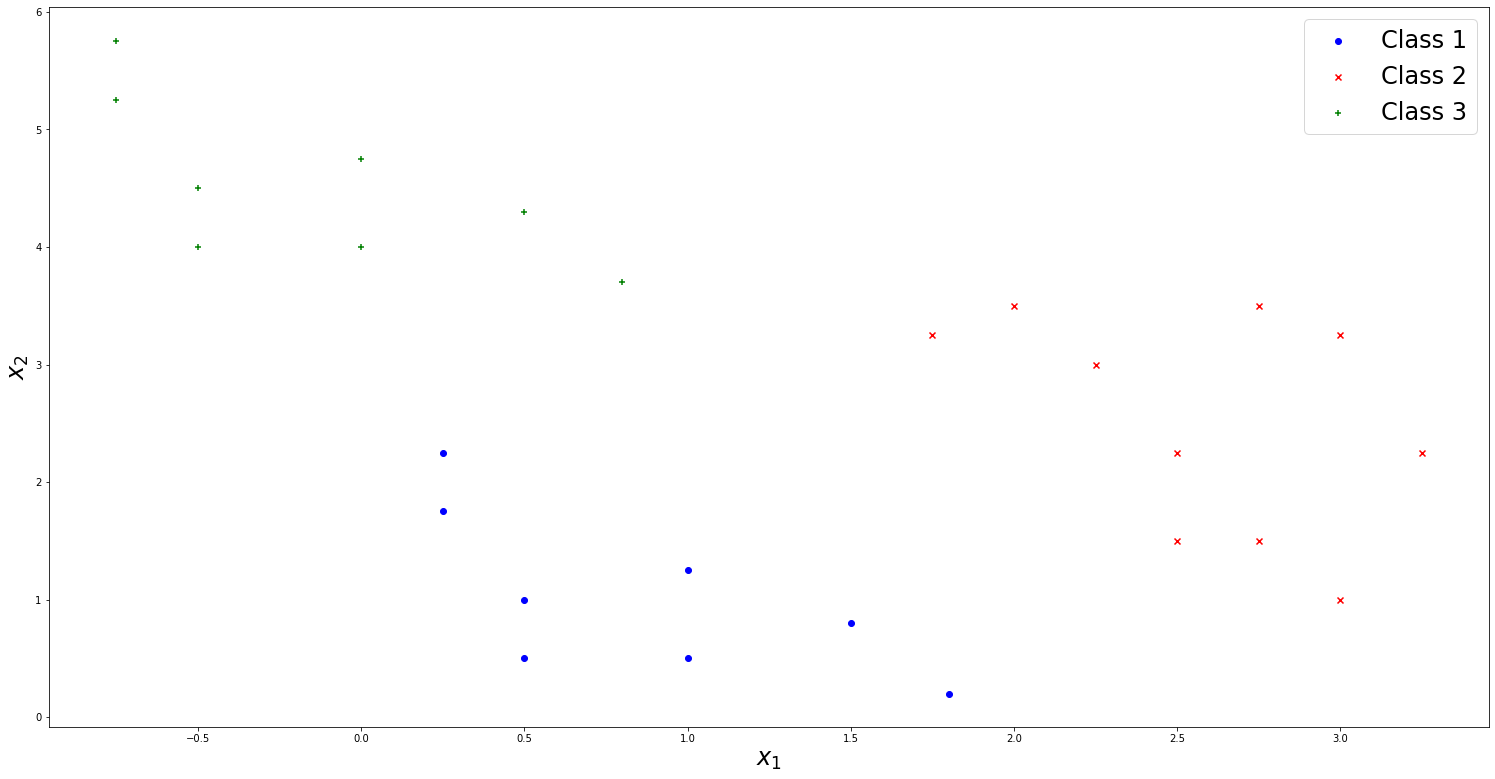

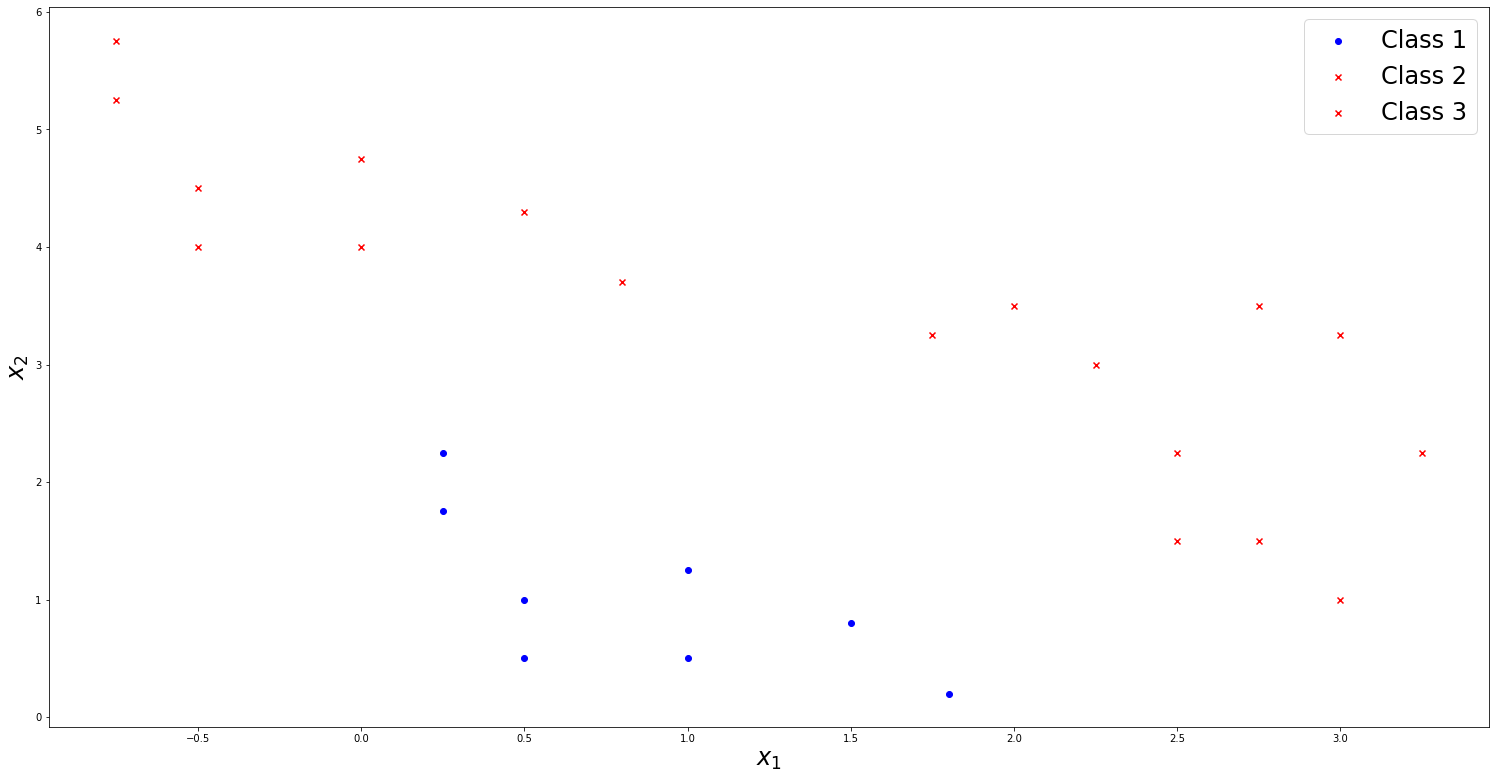

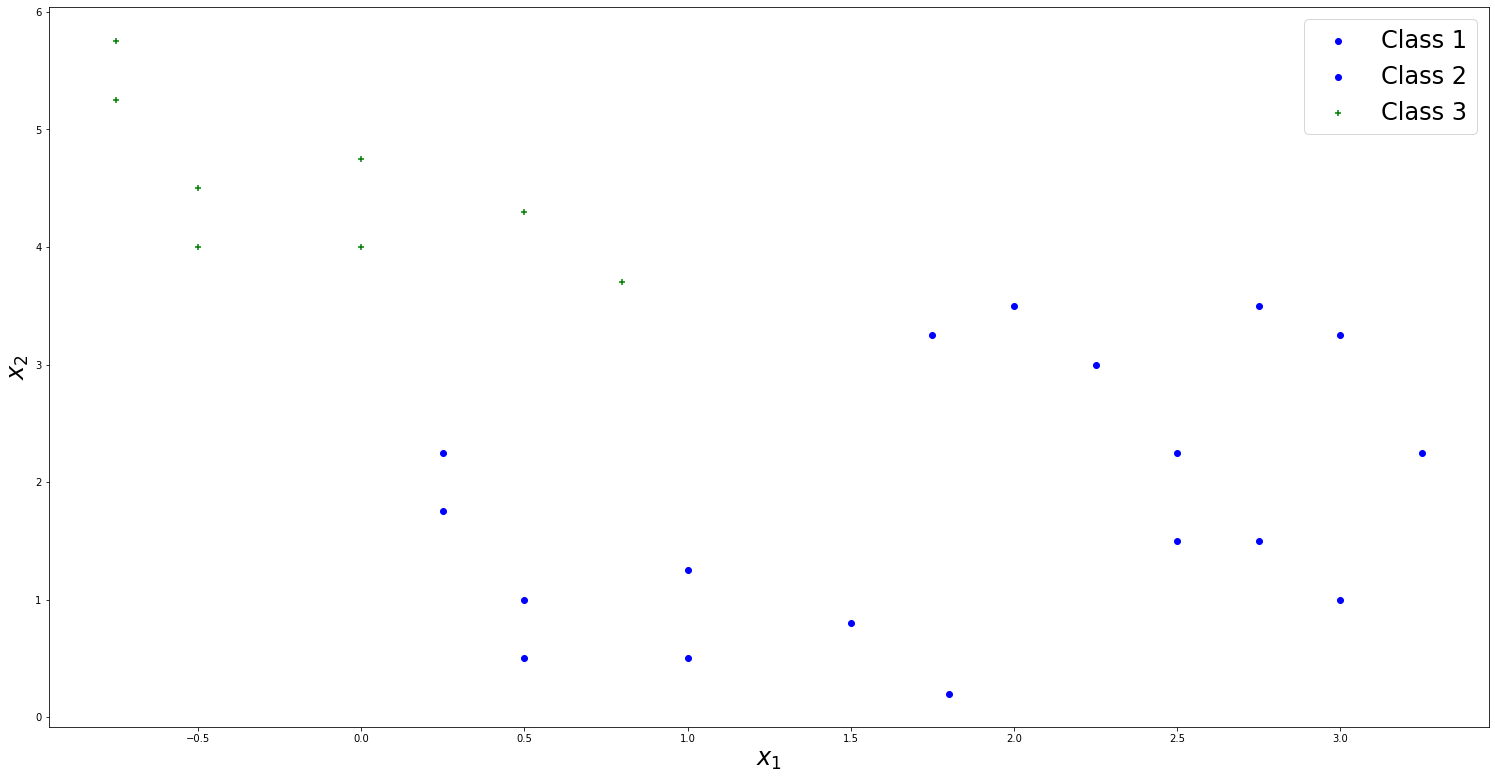

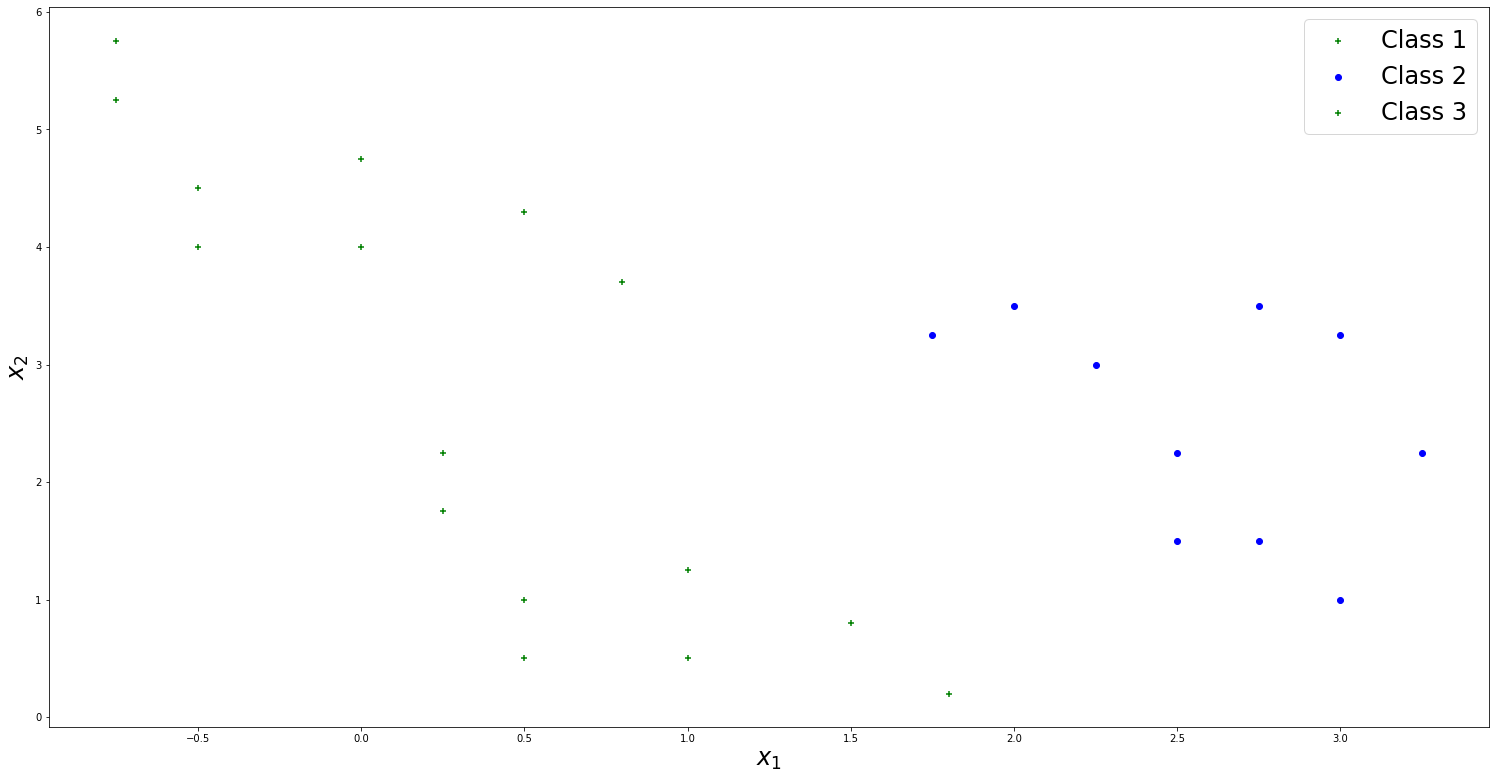

In [4]:
# Set up training sample
X1 = [[0.5,0.5],[1.0,0.5],[1.8,0.2],[1.5,0.8],[0.5,1.0],[1.0,1.25],[0.25,1.75],[0.25,2.25]]
X2 = [[3.0,1.0],[2.75,1.5],[2.5,1.5],[2.5,2.25],[3.25,2.25],[2.25,3.0],[3.0,3.25],[1.75,3.25],
        [2.0,3.5],[2.75,3.5]]
X3 = [[x[0]-1,x[1]+3.5] for x in X1]
x11 = [x[0] for x in X1]
x12 = [x[1] for x in X1]
x21 = [x[0] for x in X2]
x22 = [x[1] for x in X2]
x31 = [x[0] for x in X3]
x32 = [x[1] for x in X3]

# Plot data
fig=plt.figure(figsize=(20,10));
ax=fig.add_axes([0,0,1,1]);
ax.scatter(x11,x12,color='b',marker="o");
ax.scatter(x21,x22,color='r',marker="x");
ax.scatter(x31,x32,color='g',marker="+");
ax.set_xlabel('$x_1$',fontsize=24);
ax.set_ylabel('$x_2$',fontsize=24);
ax.legend(("Class 1","Class 2","Class 3"),fontsize=24);

# Plot data
fig=plt.figure(figsize=(20,10));
ax=fig.add_axes([0,0,1,1]);
ax.scatter(x11,x12,color='b',marker="o");
ax.scatter(x21,x22,color='r',marker="x");
ax.scatter(x31,x32,color='r',marker="x");
ax.set_xlabel('$x_1$',fontsize=24);
ax.set_ylabel('$x_2$',fontsize=24);
ax.legend(("Class 1","Class 2","Class 3"),fontsize=24);

# Plot data
fig=plt.figure(figsize=(20,10));
ax=fig.add_axes([0,0,1,1]);
ax.scatter(x11,x12,color='b',marker="o");
ax.scatter(x21,x22,color='b',marker="o");
ax.scatter(x31,x32,color='g',marker="+");
ax.set_xlabel('$x_1$',fontsize=24);
ax.set_ylabel('$x_2$',fontsize=24);
ax.legend(("Class 1","Class 2","Class 3"),fontsize=24);

# Plot data
fig=plt.figure(figsize=(20,10));
ax=fig.add_axes([0,0,1,1]);
ax.scatter(x11,x12,color='g',marker="+");
ax.scatter(x21,x22,color='b',marker="o");
ax.scatter(x31,x32,color='g',marker="+");
ax.set_xlabel('$x_1$',fontsize=24);
ax.set_ylabel('$x_2$',fontsize=24);
ax.legend(("Class 1","Class 2","Class 3"),fontsize=24);

In this example, each time we train the logitistic regression, we get a new hypothesis, giving three separate hypotheses:

$$ h_\theta^{(1)} (x), h_\theta^{(2)} (x), h_\theta^{(3)} (x) $$

The subscript indicates that we treat that class as the positive class, while the other two are treated as the negative class. The hypothesis now provides

$$ h_\theta^{(i)} (x) = P(y=i|x;\theta) \text{ for } i \in \{1,2,3\} $$

Now, on a new input, to make a prediction, we can list the probability that the input belongs to three different classes and we pick the class with the highest probability. 

## Regularization

Regularization helps models prevent overfitting the training data.

### The Problem of Overfitting

Overfitting the model to the data is a problem. Underfitting is also undesirable. An example of underfitting in a linear regression is trying to fit something quadratic (polynomial of degree 2) in nature to a single line (polynomial of degree 1). An example of overfitting is if we fit our training dataset to a higher degree polynomial (>2) when the training set is clearly quadratic. In these cases, the model will often exhibit high variance between the training data sets that it was trained to fit. If we've overfit the model to the data, our cost function output on the minimized parameters will be quite small, but the model will be unreasonable. We can also under/overfit logistic regressions. Imagine points in the parameter space that mix together somewhat, but still have a radial clustering, implying a circular hypothesis function would be best. A simple linear classification would underfit the model as it would inevitably split our radial separation along some line. We could also have some complicated function that overfits the training data by exactly carves a decision boundary between the two clases.

The primary issue with overfitting is that is makes accurate predictions for examples in the training set but fails to generalize well to make accurate predictions on new, previously unseen examples. If we think overfitting is occurring, what can we do to address it? Sometimes, we can have a lot of features and too few training data points. Our options to addressing overfitting are
1. Reduce number of features
   * Manually select which features to keep
   * Model selection algorithm (covered later in course)
2. Regularization
   * Keep all features, but reduce magnitude/values of parameters
   * Works well when we have a lot of features, each of which are useful for prediction output
 
### Cost Function
 
Let's say we have a model that behaves quadratically. Then our best hypothesis to work with would be 
 
$$ h_\theta (x) = \theta_0 + \theta_1 x + \theta_2 x^2 $$
 
But let's say we work with a more complicated polynomial instead that is going to overfit the data:
 
$$ h_\theta (x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 $$
  
What we may do here is penalize this function to make 

$$ \theta_3 \text{ and } \theta_4 $$

really small. So we may try to minimize with the following cost function, as a modification of the cost function we saw before:

$$
\frac{1}{2 m} \sum_{i=1}^m \Big( h_\theta (x^{(i)} - y^{(i)} \Big)^2 +1000 \theta_3^2 + 1000 \theta_4^2
$$

Minimizing this function is going to cause

$$ \theta_3 \approx 0 \text{ and } \theta_4 \approx 0 $$

which scales more closely to our quadratic function. This is the idea behind regularization. Setting parameters to smaller values yields a much simpler hypothesis that is less prone to overfitting. This need not apply to complicated functions. We could instead have a large number of features where some are more important than others. What we can do is add a "regularization term" in the cost function such that

$$
J (\theta) = \frac{1}{2 m} \sum_{i=1}^m \Big( h_\theta (x^{(i)} - y^{(i)} \Big)^2 + \lambda \sum_{j=1}^n \theta_j^2
$$

where
* $\lambda$ is the regularization parameter

This will shrink *all* of the parameters. By convection, we don't regularize on the parameter

$$ \theta_0 $$

but this makes very little difference. If we choose a very large regularization parameter,

$$ \lambda \gg 1 $$

then our parameters 

$$ \theta_1, \theta_2, \cdots, \theta_m \approx 0 $$

and our hypothesis becomes a straight line about

$$ \theta_0 $$

In this case, we're underfitting the training set. Therefore, we have to be careful how we choose this regularization parameter.

### Regularized Linear Regression

We'll take the linear regression gradient descent and normal equation algorithms and generalize them for regularization. For gradient descent, we'll update our parameters as such:

$$
\begin{align}
    \theta_0 & := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \Big( h_\theta (x^{(i)}) - y^{(i)} \Big) x_0^{(i)} \\
    \theta_j & := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \Big( h_\theta (x^{(i)}) - y^{(i)} \Big) x_j^{(i)} + \frac{\lambda}{m} \theta_j,  \text{ for } j \in \{1,2,\cdots,n\} \\
    & := \theta_j(1-\alpha\frac{\lambda}{m}) - \alpha\frac{1}{m} \sum_{i=1}^m \Big( h_\theta (x^{(i)}) - y^{(i)} \Big) x_j^{(i)}
\end{align}
$$

Note that

$$ 1-\alpha\frac{\lambda}{m} < 1 $$

although it is likely going to still be close to 1. So what this does is scale down the parameters while also performing the gradient descent.

For our normal equation method, recall

$$
X = \begin{bmatrix} (x^{(1)})^T \\ (x^{(2)})^T \\ \vdots \\ (x^{(m)})^T \end{bmatrix} \in \mathbb{R}^{m \times (n+1)}
\text{ and }
y = \begin{bmatrix} y^{(1)} \\ y{(2)} \\ \vdots \\ y^{(m)} \end{bmatrix} \in \mathbb{R}^{m}
$$

Our forumla for solving via the normal equation with regularization is

$$
\theta = (X^T X + \lambda L)^{-1}X^T y, \\
$$

where

$$
L = 
\begin{bmatrix} 
0 & 0 & 0 & 0 & \cdots \\
0 & 1 & 0 & 0 & \cdots \\
\vdots & 0 & 1 & 0 & \cdots \\
\vdots & \vdots & \ddots & \ddots & \ddots \\
0 & 0 & 0 & \cdots & 1
\end{bmatrix}
\in \mathbb{R}^{(n+1) \times (n+1)}
$$

Fortunately, so long as 

$$ \lambda > 0 $$

we are *guaranteed* that

$$ X^T X + \lambda L $$

is invertible or non-singular!

### Regularized Logistic Regression

Now let's see how to apply regularization to logistic regressions, using both gradient descent and the more advanced optimization techniques. To modify our cost function, we'll again add a term to our original cost function:

$$ J (\theta) = - \frac{1}{m} \Big( \sum_{i=1}^m y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1 - h_\theta(x^{(i)})) \Big) + \frac{\lambda}{2 m} \sum_{j=1}^n \theta_j^2, \text{ for } j \in \{1,2,\cdots,n\} $$

To implement this in gradient descent, replace parameters as such:

$$
\begin{align}
    \theta_0 & := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \Big( h_\theta (x^{(i)}) - y^{(i)} \Big) x_0^{(i)} \\
    \theta_j & := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \Big( h_\theta (x^{(i)}) - y^{(i)} \Big) x_j^{(i)} + \frac{\lambda}{m} \theta_j,  \text{ for } j \in \{1,2,\cdots,n\} \\
    & := \theta_j(1-\alpha\frac{\lambda}{m}) - \alpha\frac{1}{m} \sum_{i=1}^m \Big( h_\theta (x^{(i)}) - y^{(i)} \Big) x_j^{(i)}
\end{align}
$$

Again, this looks identical to our linear regression, but remember that our hypothesis function is now the sigmoid function, rather than a linear equation.

For the advanced optimization algorithms, we still let the software do this for us, but we have to pass on the updated cost function and the gradients for all features except the first one.